In [1]:
from datetime import datetime, timedelta, timezone


from polyautomate.api.trading import PolymarketTradingClient
from polyautomate.catalog import MarketCatalog
from polyautomate.history import PriceHistoryService
from polyautomate.models import OrderRequest
from polyautomate.archive import MarketHistoryExporter

import matplotlib.pyplot as plt

In [2]:
gamma = MarketCatalog()
event = gamma.get_event("when-will-the-government-shutdown-end-545")
market = event.markets[0]
condition_id = market.condition_id
token_id = market.clob_token_ids[0]

In [3]:
service = PriceHistoryService()
history = service.get_price_history(condition_id, token_id, interval="1m")

In [4]:
history.to_dataframe()

,price
timestamp,
2025-10-06 17:40:03+00:00,0.3850
2025-10-06 17:50:04+00:00,0.4550
2025-10-06 18:00:04+00:00,0.2500
2025-10-06 18:10:05+00:00,0.2500
2025-10-06 18:20:03+00:00,0.2600
...,...
2025-10-15 08:30:06+00:00,0.0005
2025-10-15 08:40:05+00:00,0.0005
2025-10-15 08:50:08+00:00,0.0005


In [12]:
from polyautomate.catalog import MarketCatalog

catalog = MarketCatalog()
markets = catalog.search_markets(closed=False, limit=20)
for market in markets:
    print(market.question, market.condition_id, market.clob_token_ids)


ARCH Will the match be a draw?  []
Fed rate hike in 2025? 0x4319532e181605cb15b1bd677759a3bc7f7394b2fdf145195b700eeaedfd5221 ['60487116984468020978247225474488676749601001829886755968952521846780452448915', '81104637750588840860328515305303028259865221573278091453716127842023614249200']
US recession in 2025? 0xfa48a99317daef1654d5b03e30557c4222f276657275628d9475e141c64b545d ['104173557214744537570424345347209544585775842950109756851652855913015295701992', '44528029102356085806317866371026691780796471200782980570839327755136990994869']
Fed emergency rate cut in 2025? 0xcddb4f52babca280f8e5fc4b9146f2520f0bfb88e134ff9ac8d52ea674185d79 ['86651051340048717188016545368005905974650771288612142430184256026061526806964', '75975189968532037196988790733987170931760654987961628737079930912099775045276']
Tether insolvent in 2025? 0x1bbdc459d73e6972f5ba1f687d739fde70a9774f4875611699fb00a9eb28f090 ['22999731098119206643487263219621291731133602508852896696306511964985382013346', '106084157476430127474

In [13]:
questions = catalog.search_markets(closed=False, limit=20)
questions

[CatalogMarket(id='502517', question='ARCH Will the match be a draw?', slug='will-the-match-be-a-draw-romania-ukraine', condition_id='', enable_order_book=True, clob_token_ids=[], raw={'id': '502517', 'question': 'ARCH Will the match be a draw?', 'conditionId': '', 'slug': 'will-the-match-be-a-draw-romania-ukraine', 'resolutionSource': '', 'endDate': '2024-06-17T12:00:00Z', 'startDate': '2024-06-17T03:51:23.112Z', 'image': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/euro-2024-spain-vs-croatia-hMVrh1C7sGqw.png', 'icon': 'https://polymarket-upload.s3.us-east-2.amazonaws.com/euro-2024-spain-vs-croatia-hMVrh1C7sGqw.png', 'description': 'This market refers to the 2024 UEFA European Football Championship match between Romania and Ukraine scheduled for June 17, 9:00 AM ET.\n\nIf the match ends in a draw this market will resolve to "Yes". Otherwise this market will resolve to "No". ', 'outcomes': '["Yes", "No"]', 'active': True, 'closed': False, 'marketMakerAddress': '', 'createdAt':

<Axes: xlabel='timestamp'>

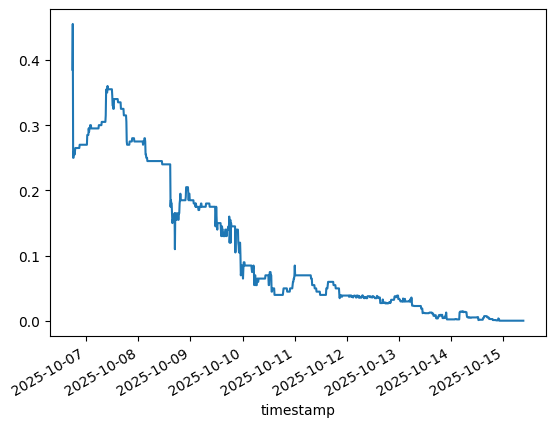

In [7]:
history.to_dataframe()["price"].plot()

In [8]:
history.to_dataframe()

,price
timestamp,
2025-10-06 17:40:03+00:00,0.3850
2025-10-06 17:50:04+00:00,0.4550
2025-10-06 18:00:04+00:00,0.2500
2025-10-06 18:10:05+00:00,0.2500
2025-10-06 18:20:03+00:00,0.2600
...,...
2025-10-15 08:30:06+00:00,0.0005
2025-10-15 08:40:05+00:00,0.0005
2025-10-15 08:50:08+00:00,0.0005


In [17]:
exporter = MarketHistoryExporter(output_dir="history")
summary = exporter.export_search(query="shutdown", closed=False, interval="1m")
print(summary.failed, "failures")
for result in summary.successes:
    print(result.path, result.rows)


AttributeError: 'list' object has no attribute 'failed'

In [18]:
summary

[]